In [1]:
import pandas as pd
import numpy as np
import os
from fcmvpa.mvpa import MVPA

In [2]:
proj = 'sliced_time_series_30_30'
experiment = 'random'

In [3]:
if experiment == 'uval':
    u_values = pd.read_csv(os.path.join(proj, 'u_values.csv'))
elif experiment == 'random':
    u_values = pd.read_csv('random_values.csv')
u_values_td_adhd = np.array(u_values['td-adhd'])
u_values_td_asd = np.array(u_values['td-asd'])

median_td_adhd = np.median(u_values_td_adhd)
median_td_asd = np.median(u_values_td_asd)

td_adhd_importance = np.argsort(np.abs(u_values_td_adhd - median_td_adhd))[::-1]
td_asd_importance = np.argsort(np.abs(u_values_td_asd - median_td_asd))[::-1]


In [ ]:
print("TD-ADHD 상위 10개 중요도:", td_adhd_importance[:10])
print("TD-ASD 상위 10개 중요도:", td_asd_importance[:10])

In [ ]:
adhd_train = os.path.join(proj, './adhd_total_data_zpos_train0.8.csv')
adhd_test = os.path.join(proj, './adhd_total_data_zpos_test0.2.csv')
v_mean_0, _, _, test_0, best_0, conf_0 =  MVPA.mvpa_fit(adhd_train, adhd_test, td_adhd_importance, 'td-adhd', 300, 42, f'./{proj}/td_adhd_{experiment}.pkl', 10)

In [ ]:
MVPA.svm_feature_selection(adhd_train, adhd_test, td_adhd_importance, 'td-adhd', np.argmax(v_mean_0))

/home/work/chosungjae/fmri/fcmvpa/fcmvpa/machine_learning/mvpa.py:43: DtypeWarning: Columns (13696) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_csv, header=None)


1


/home/work/chosungjae/fmri/fcmvpa/fcmvpa/machine_learning/mvpa.py:65: DtypeWarning: Columns (13696) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(test_csv, header=None)
Run 1: Training SVM on validation set: 100% 300/300 [00:04<00:00, 64.11it/s]


Test accuracy with best feature set of run 1: 0.5185


Run 2: Training SVM on validation set: 100% 300/300 [00:04<00:00, 60.92it/s]


Test accuracy with best feature set of run 2: 0.5648


Run 3: Training SVM on validation set: 100% 300/300 [00:04<00:00, 62.09it/s]


Test accuracy with best feature set of run 3: 0.6389


Run 4: Training SVM on validation set: 100% 300/300 [00:04<00:00, 61.18it/s]


Test accuracy with best feature set of run 4: 0.5556


Run 5: Training SVM on validation set: 100% 300/300 [00:04<00:00, 61.02it/s]


Test accuracy with best feature set of run 5: 0.6019


Run 6: Training SVM on validation set: 100% 300/300 [00:04<00:00, 62.81it/s]


Test accuracy with best feature set of run 6: 0.5648


Run 7: Training SVM on validation set: 100% 300/300 [00:05<00:00, 59.18it/s]


Test accuracy with best feature set of run 7: 0.6111


Run 8: Training SVM on validation set: 100% 300/300 [00:04<00:00, 61.57it/s]


Test accuracy with best feature set of run 8: 0.5648


Run 9: Training SVM on validation set: 100% 300/300 [00:04<00:00, 60.66it/s]


Test accuracy with best feature set of run 9: 0.5648


Run 10: Training SVM on validation set: 100% 300/300 [00:04<00:00, 60.46it/s]


Test accuracy with best feature set of run 10: 0.5741


Permutation Test: 100% 300/300 [00:10<00:00, 29.83it/s]


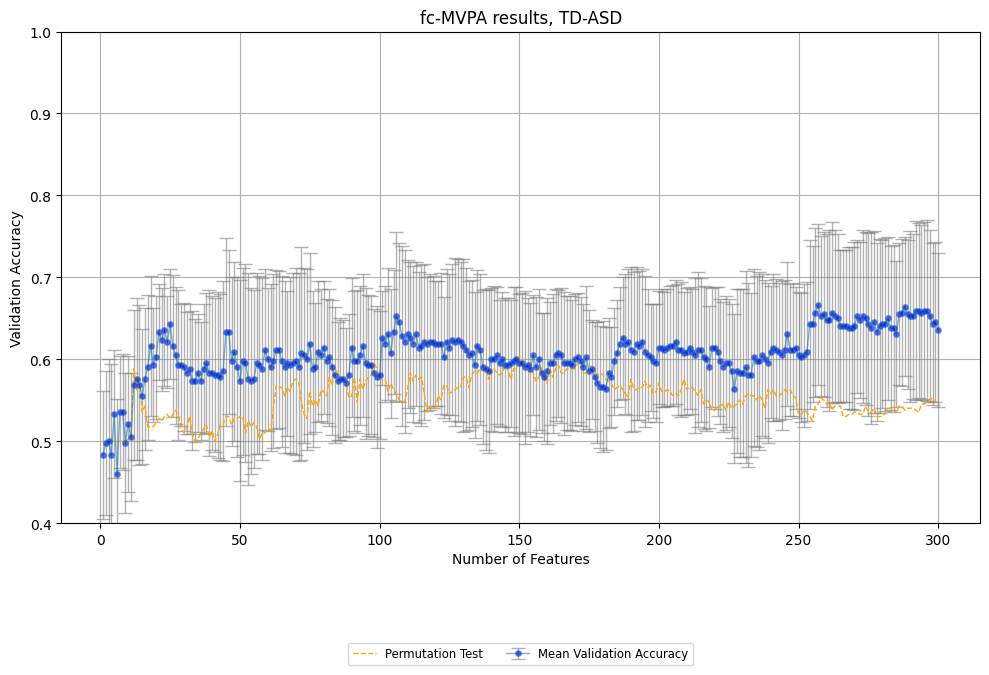

Mean test accuracy: 0.5759
Test accuracy standard deviation: 0.0318
Parameters saved to ./sliced_time_series_30_30/td_asd_random.pkl


In [17]:
asd_train = os.path.join(proj, './asd_total_data_zpos_train0.8.csv')
asd_test = os.path.join(proj, './asd_total_data_zpos_test0.2.csv')
v_mean_1, _, _, test_1, best_1, conf_1 = MVPA.mvpa_fit(asd_train, asd_test, td_asd_importance, 'td-asd', 300, 42, f'./{proj}/td_asd_{experiment}.pkl', 10)

In [ ]:
MVPA.svm_feature_selection(asd_train, asd_test, td_asd_importance, 'td-asd', np.argmax(v_mean_1))